In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('Customer Churn.csv')

In [3]:
df.head(5)

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,FN,FP,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,177.8760,69.7640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,41.4315,60.0000,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,1382.8680,203.6520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,216.0180,74.0020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,131.2245,64.5805,0


In [4]:
df.columns

Index(['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount',
       'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Age',
       'Customer Value', 'FN', 'FP', 'Churn'],
      dtype='object')

In [5]:
df.describe()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,FN,FP,Churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,1.077778,1.248254,30.998413,470.972916,423.875624,98.304688,0.157143
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,0.267864,0.432069,8.831095,517.015433,465.313890,50.724492,0.363993
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000,60.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,1.000000,1.000000,25.000000,113.801250,102.421125,61.380125,0.000000
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,1.000000,1.000000,30.000000,228.480000,205.632000,72.848000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,1.000000,1.000000,30.000000,788.388750,709.549875,128.838875,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,55.000000,2165.280000,1948.752000,266.528000,1.000000


In [6]:
df.isna().any()

Call  Failure              False
Complains                  False
Subscription  Length       False
Charge  Amount             False
Seconds of Use             False
Frequency of use           False
Frequency of SMS           False
Distinct Called Numbers    False
Age Group                  False
Tariff Plan                False
Status                     False
Age                        False
Customer Value             False
FN                         False
FP                         False
Churn                      False
dtype: bool

In [7]:
#df with only x variables

In [8]:
#dfx=df.drop(columns=['Churn'])

In [9]:
#EDA

array([[<AxesSubplot:title={'center':'Call  Failure'}>,
        <AxesSubplot:title={'center':'Complains'}>,
        <AxesSubplot:title={'center':'Subscription  Length'}>,
        <AxesSubplot:title={'center':'Charge  Amount'}>],
       [<AxesSubplot:title={'center':'Seconds of Use'}>,
        <AxesSubplot:title={'center':'Frequency of use'}>,
        <AxesSubplot:title={'center':'Frequency of SMS'}>,
        <AxesSubplot:title={'center':'Distinct Called Numbers'}>],
       [<AxesSubplot:title={'center':'Age Group'}>,
        <AxesSubplot:title={'center':'Tariff Plan'}>,
        <AxesSubplot:title={'center':'Status'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Customer Value'}>,
        <AxesSubplot:title={'center':'FN'}>,
        <AxesSubplot:title={'center':'FP'}>,
        <AxesSubplot:title={'center':'Churn'}>]], dtype=object)

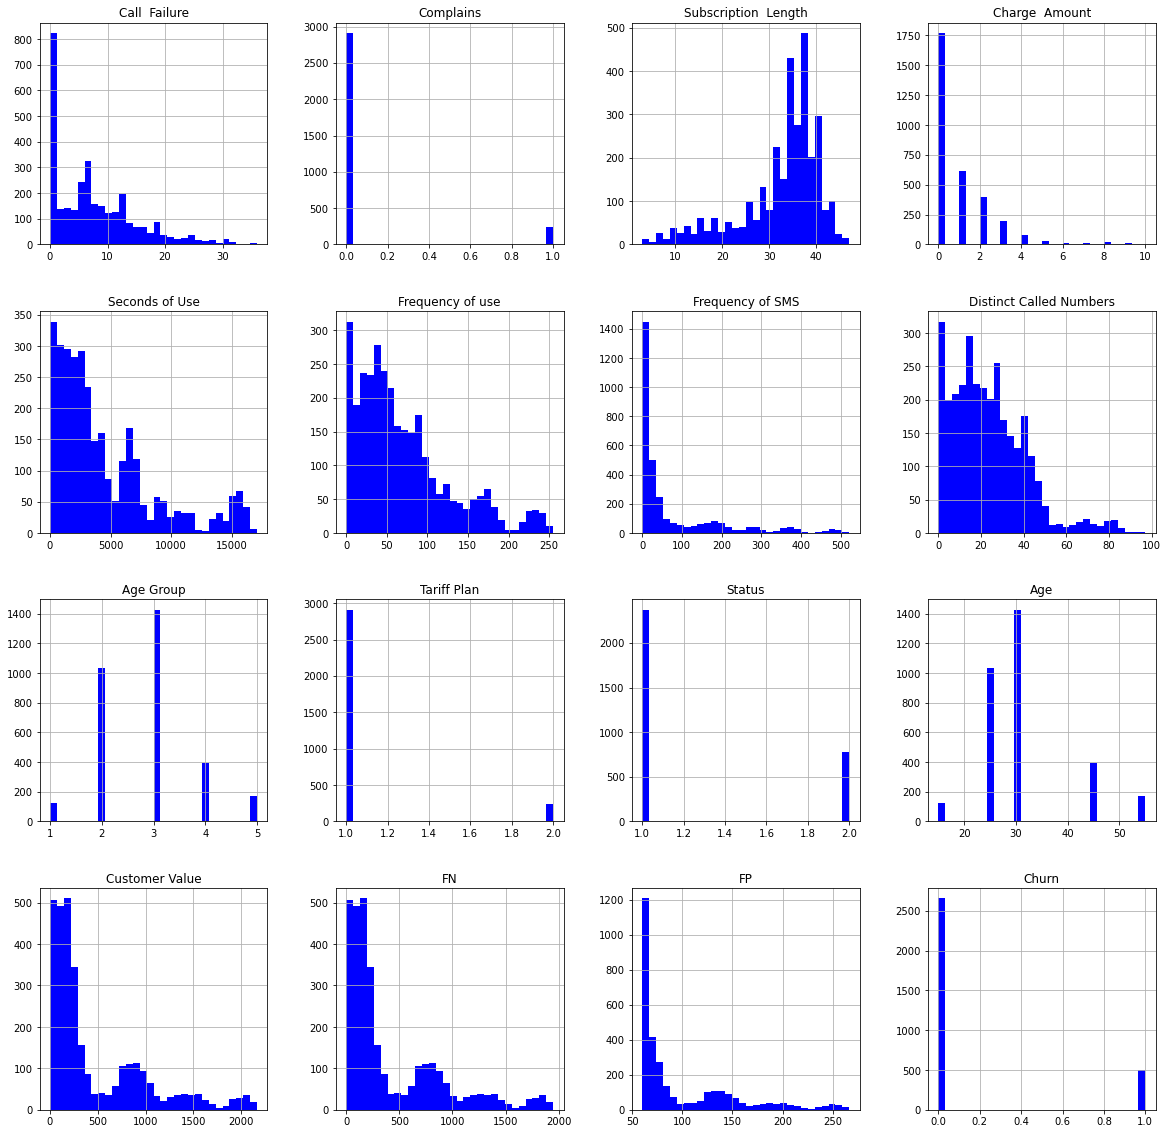

In [10]:
df.hist(bins = 30, figsize = (20, 20), color = 'b')

In [11]:
binarydata=df[['Complains', 'Tariff Plan', 'Status', 'Churn']]

<AxesSubplot:title={'center':'Correlation with Response Variable'}>

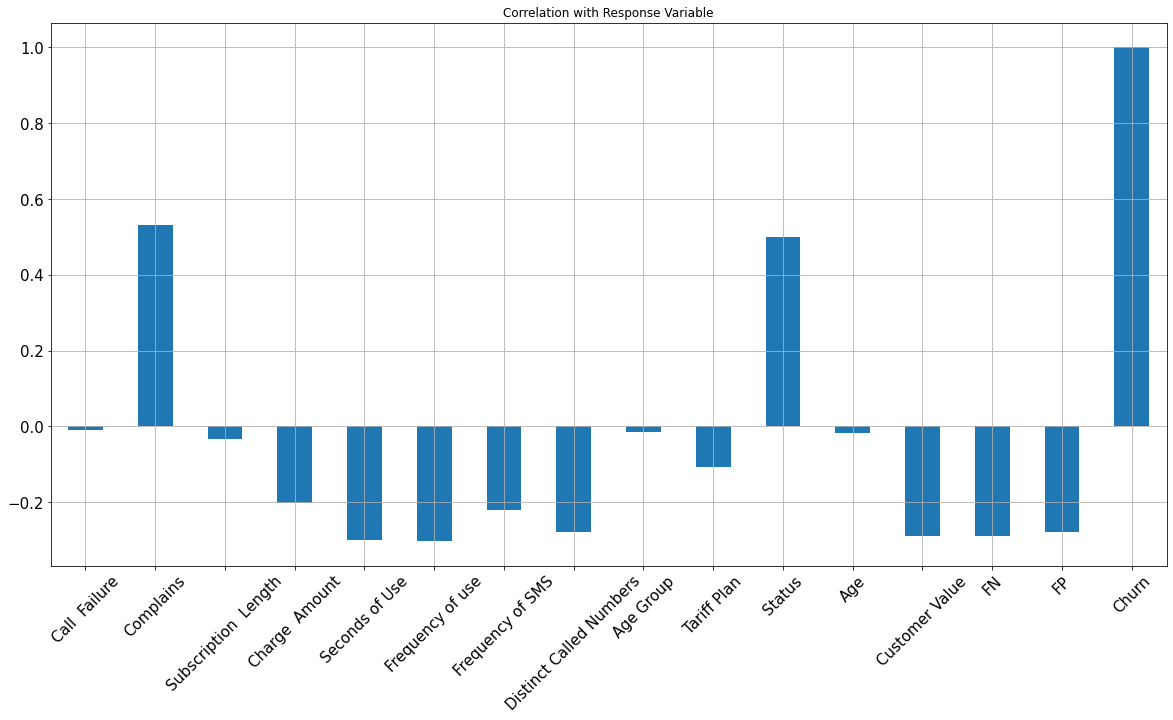

In [12]:
df.corrwith(df.Churn).plot.bar(figsize = (20, 10), title = 'Correlation with Response Variable', fontsize = 15, rot = 45, 
                               grid = True)

<AxesSubplot:>

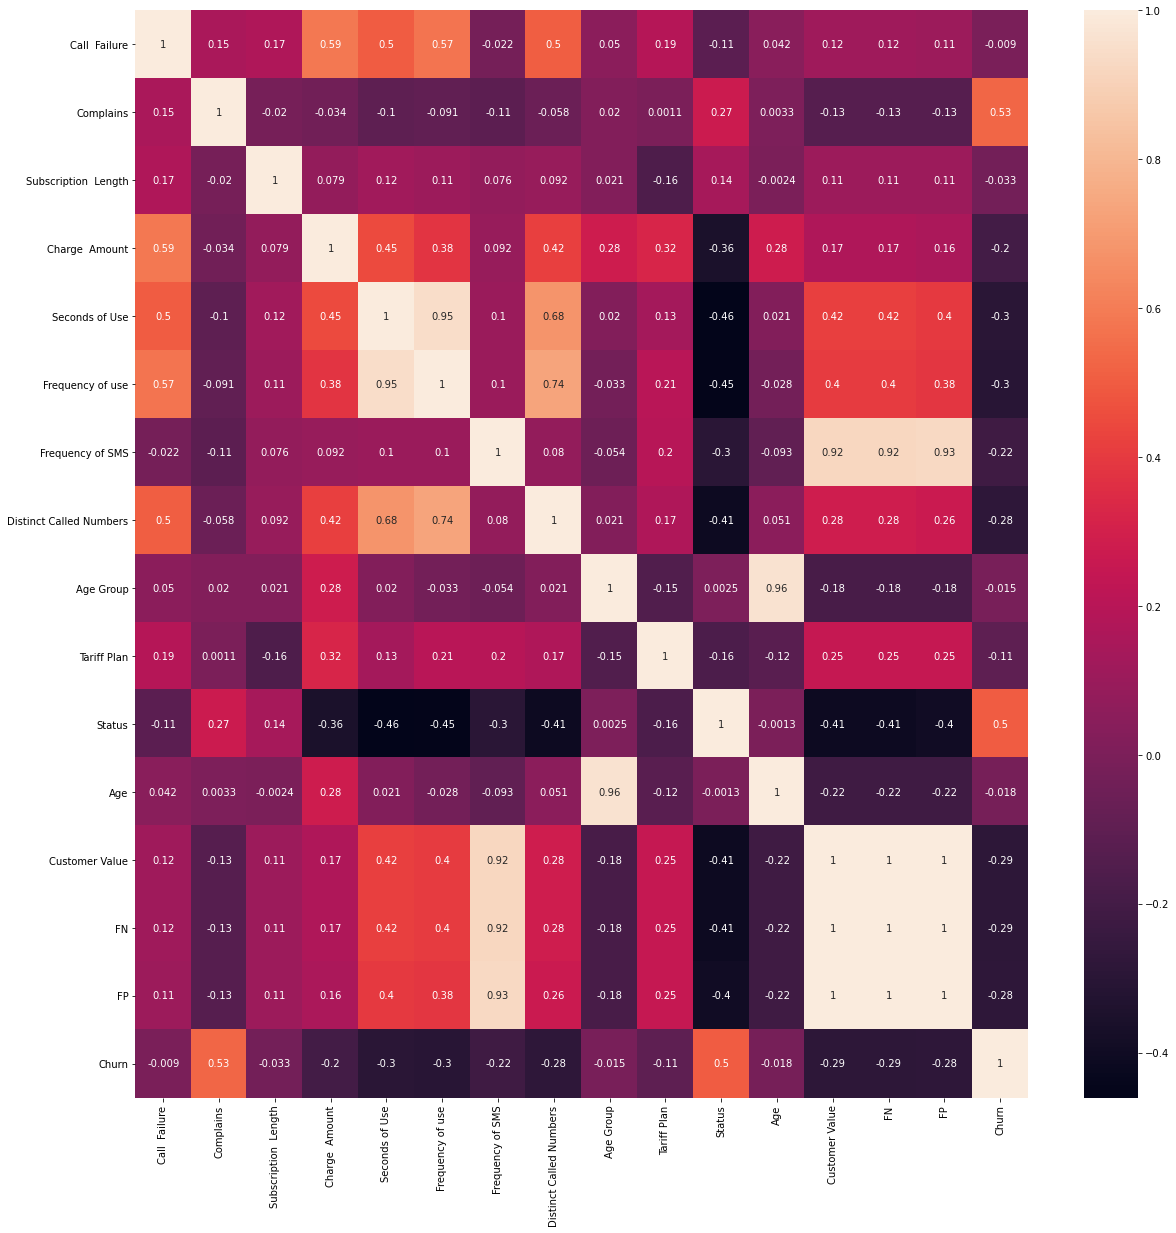

In [13]:
corr=df.corr()
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(corr, annot = True)

In [14]:
#HIGH CORRELATIONS
#charge amount:call failure, seconds of use, distinct called numbers
#call failure:charge amount, freq of use
#distinct: second, Freq of use
#Seconds of use:frequency of use, distinct called numbers
#freq of use:call failure, seconds of use, distinct called numbers
#age group:age
#age:age grop
#customer value, SMS, FN, and FP all highly/perfectly correlated with each other.  
 

#number of times var appears in above list:
#charge amount 3
#call failure 1
#distinct 2
#seconds 2
#freq of use 3
#SMS
#age group and age
#triad


In [15]:
# use charge amount, freq of use, age, customer value

In [16]:
# many correlated variables. Attempting dimensionality reduction

In [17]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [20]:
pca = PCA (n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [21]:
X_train

array([[-1.16118799, -0.22254523],
       [ 1.50062418, -0.55036414],
       [ 1.61684018,  3.53231049],
       ...,
       [ 4.93466037,  4.09906183],
       [ 4.08407503, -3.85058295],
       [-2.65804967, -1.34229898]])

In [22]:
pca_df = pd.DataFrame(data = X_train, columns = ['PCA1', 'PC2'])
pca_df.head(5)

,PCA1,PC2
0,-1.161188,-0.222545
1,1.500624,-0.550364
2,1.616840,3.532310
3,1.703865,1.014194
4,-1.147496,0.211982


In [23]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[508  21]
 [ 80  21]]


0.8396825396825397

In [25]:
#LDA

In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [27]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[508  21]
 [ 82  19]]


0.8365079365079365

In [29]:
#Kernal PCA

In [30]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA (n_components=2, kernel = 'rbf')
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)

In [31]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[529   0]
 [101   0]]


0.8396825396825397

In [33]:
precision_score(y_test, y_pred)

C:\Users\quinn\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [34]:
recall_score(y_test, y_pred)

0.0

In [35]:
f1_score(y_test, y_pred)

0.0

In [36]:
#K-Fold Cross Validation Classification

In [37]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

In [38]:
accuracies

array([0.8452381 , 0.8452381 , 0.8452381 , 0.8452381 , 0.8452381 ,
       0.8452381 , 0.84126984, 0.84126984, 0.84126984, 0.84126984])

In [39]:
accuracies.mean()

0.8436507936507937

In [40]:
#try dropping correlated variables (no dimension reduction)

In [41]:
# use charge amount, freq of use, age, customer value. Drop all others.

In [42]:
df = pd.read_csv('Customer Churn.csv')

In [43]:
df.head(5)

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,FN,FP,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,177.8760,69.7640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,41.4315,60.0000,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,1382.8680,203.6520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,216.0180,74.0020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,131.2245,64.5805,0


In [44]:
data2=df[['Call  Failure', 'Frequency of use', 'Age', 'Customer Value', 'Churn']]

In [45]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [48]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[524  21]
 [ 40  45]]


0.9031746031746032

In [50]:
precision_score(y_test, y_pred)

0.6818181818181818

In [51]:
recall_score(y_test, y_pred)

0.5294117647058824

In [52]:
f1_score(y_test, y_pred)

0.5960264900662252

In [53]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

In [54]:
accuracies

array([0.88492063, 0.88888889, 0.88095238, 0.9047619 , 0.87698413,
       0.9047619 , 0.86904762, 0.88492063, 0.88492063, 0.88492063])

In [55]:
accuracies.mean()

0.8865079365079364

In [56]:
precision_score(y_test, y_pred)

0.6818181818181818

In [57]:
recall_score(y_test, y_pred)

0.5294117647058824

In [58]:
f1_score(y_test, y_pred)

0.5960264900662252

Test Data Accuracy: 0.9032


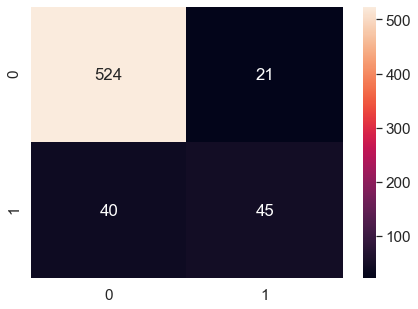

In [65]:
df_cm = pd.DataFrame(cm, index = (0,1), columns = (0,1))
plt.figure(figsize = (7,5))
sns.set(font_scale = 1.4)
sns.heatmap(df_cm, annot = True, fmt = 'g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))